In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import scipy.optimize as opt
import scipy.stats
import generate_pvt_occ as gen_pvt_occ
import generate_bus_occ as gen_bus_occ

In [2]:
occ_pvt_gen = gen_pvt_occ.Generator("./PvtOccupancyFreq.csv")
occ_bus_gen = gen_bus_occ.Generator("./BusOccFreq.csv")

In [3]:
plot_df_pvt = pd.read_csv("./PvtOccupancyProb.csv")
#plot_df_pvt_freq = pd.read_csv("./PvtOccupancyFreq.csv") 

plot_df_bus = pd.read_csv("./BusOccProb.csv")
#plot_df_bus_freq = pd.read_csv("./BusOccFreq.csv")

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035]),
 <a list of 9 Text major ticklabel objects>)

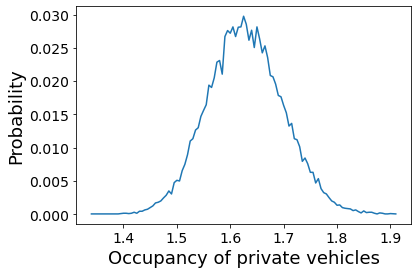

In [4]:
#View initial distribution for pvt occupancy
fig = plt.figure()
ax = plt.axes()
x_ax = plot_df_pvt['pvt_occ_means_vec']
y_ax = plot_df_pvt['Freq']


#x = np.linspace(0, 10, 1000)
#ax.bar(plot_df['pvt_occ_means_vec'],plot_df['Freq']) ##i dont know why this refuses to plot a decent bar chart!!!!!!!
plt.plot(x_ax,y_ax)
plt.xlabel('Occupancy of private vehicles',size=18)
plt.ylabel('Probability',size=18)
plt.xticks(size=14)
plt.yticks(size=14)

(array([0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065]),
 <a list of 9 Text major ticklabel objects>)

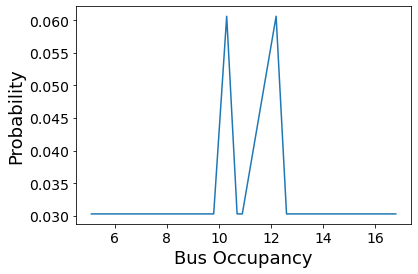

In [5]:
#View initial distribution for bus occupancy
fig = plt.figure()
ax = plt.axes()
x_ax = plot_df_bus['bus_main_data_mod']
y_ax = plot_df_bus['Freq']


#x = np.linspace(0, 10, 1000)
#ax.bar(plot_df['pvt_occ_means_vec'],plot_df['Freq']) ##i dont know why this refuses to plot a decent bar chart!!!!!!!
plt.plot(x_ax,y_ax)
plt.xlabel('Bus Occupancy',size=18)
plt.ylabel('Probability',size=18)
plt.xticks(size=14)
plt.yticks(size=14)


In [6]:
# #Create series with values for pvt vehicle occupancy
# vals_pvt= []
# for i,row in plot_df_pvt_freq.iterrows():
#     freq = int(row['Freq'])
#     for num in range(0,freq):
#         vals_pvt.append(row['pvt_occ_means_vec'])
# vals_pvt = pd.Series(vals_pvt)

#Create series with values for bus occupancy
# vals_bus= []
# for i,row in plot_df_bus_freq.iterrows():
#     freq = int(row['Freq'])
#     #print(freq)
#     for num in range(0,freq):
#         vals_bus.append(row['bus_main_data_mod'])
# vals_bus = pd.Series(vals_bus)

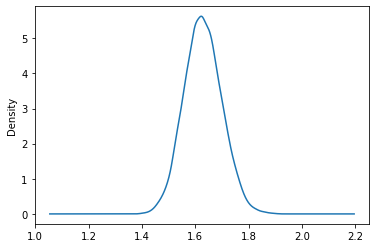

In [7]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

#vals_pvt.plot.kde()
occ_pvt_gen.plot_df_pvt_series.plot.kde()

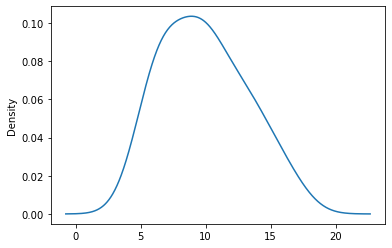

In [8]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

#vals_bus.plot.kde()
occ_bus_gen.plot_df_bus_series.plot.kde()

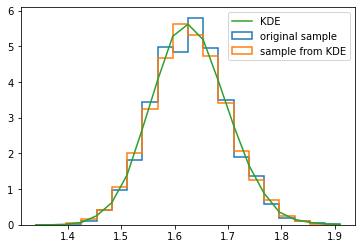

In [9]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

#####sample_pdf_pvt = scipy.stats.gaussian_kde(vals_pvt)
sample_pdf_pvt = occ_pvt_gen.plot_df_pvt_pdf

# Sample new datapoints from the KDE
new_sample_data_pvt = sample_pdf_pvt.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(occ_pvt_gen.plot_df_pvt_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data_pvt, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf_pvt(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)

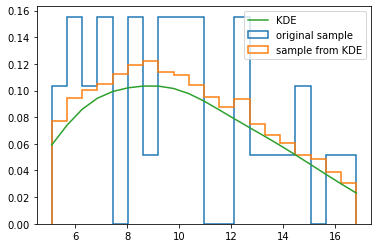

In [10]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf_bus = occ_bus_gen.plot_df_bus_pdf

# Sample new datapoints from the KDE
new_sample_data_bus = sample_pdf_bus.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(occ_bus_gen.plot_df_bus_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data_bus, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf_bus(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)


In [12]:
#To generate 100 samples from pvt occupancy distribution:
occ_pvt_gen.generate_pvt_occ(100)


array([[1.59743828, 1.67745653, 1.69021543, 1.60834234, 1.6703336 ,
        1.72026057, 1.62830827, 1.5478514 , 1.69999231, 1.67956307,
        1.65153041, 1.71288872, 1.49691796, 1.56999037, 1.76575811,
        1.58224616, 1.6068012 , 1.64007661, 1.74133115, 1.59709958,
        1.82970647, 1.64520367, 1.56572253, 1.7734164 , 1.6278493 ,
        1.69016074, 1.49521992, 1.49142793, 1.50625941, 1.65163158,
        1.58737399, 1.58950556, 1.63979138, 1.57587365, 1.63253935,
        1.48130488, 1.75473518, 1.69945013, 1.61255747, 1.68757237,
        1.77591174, 1.64950495, 1.52157462, 1.66631293, 1.55080991,
        1.66776445, 1.64507159, 1.69063826, 1.56627658, 1.53084191,
        1.62532108, 1.47888635, 1.64031378, 1.62194106, 1.6418435 ,
        1.6432669 , 1.54448894, 1.67184259, 1.59895184, 1.62874815,
        1.60470585, 1.56509787, 1.5599593 , 1.63448325, 1.70997016,
        1.60750125, 1.59076314, 1.66298284, 1.59854175, 1.57651498,
        1.73672602, 1.59325138, 1.65847211, 1.56

In [13]:
#To generate 100 samples from pvt occupancy distribution:
occ_bus_gen.generate_bus_occ(100)

array([[ 3.95201422, 12.14547132, 11.40735513, 13.47760083,  9.38741572,
        16.88347436, 14.67820003, 12.21403413,  5.6376438 , 12.58931339,
         9.38610942, 11.20700561,  8.8726986 ,  6.60604117,  9.638895  ,
         9.20291053, 10.5931471 ,  8.4267329 ,  7.88121816, 11.86018526,
         8.27354056,  8.77152229,  7.35115457,  9.32165992,  6.01817681,
        11.24916321,  5.56621939, 14.50053149,  5.34567575, 13.08351869,
        14.99334986,  6.96714821, 11.41604224,  9.65144678,  9.44446246,
         7.81424662,  8.7578944 , 14.57102821, 13.97739426,  8.53152132,
         6.62275492, 10.8576754 ,  9.93373442,  9.88052262,  4.91758147,
         8.22449539,  9.25174082, 14.94447094, 11.90600951,  7.77546537,
        11.72368453, 12.99828878,  1.49866951,  9.83605869, 17.2593593 ,
        16.66894773, 10.30318115,  7.83956939, 13.83527585,  4.19604149,
         9.59105303, 14.38918429,  9.53160696,  6.53051837,  0.30649888,
        12.25427377,  8.12597615,  4.51634749,  7.2